<a href="https://colab.research.google.com/github/darialgt/Laboratory-work/blob/main/%D0%9B%D1%80%E2%84%966.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Матченко Д.Ю. 2-9, варіант 16

Значення функції у точці x_1 = -2.5 ≈ 8.625
Значення функції у точці x_2 = -2.0 ≈ 9.0
Значення функції у точці x_3 = -0.5 ≈ -1.875


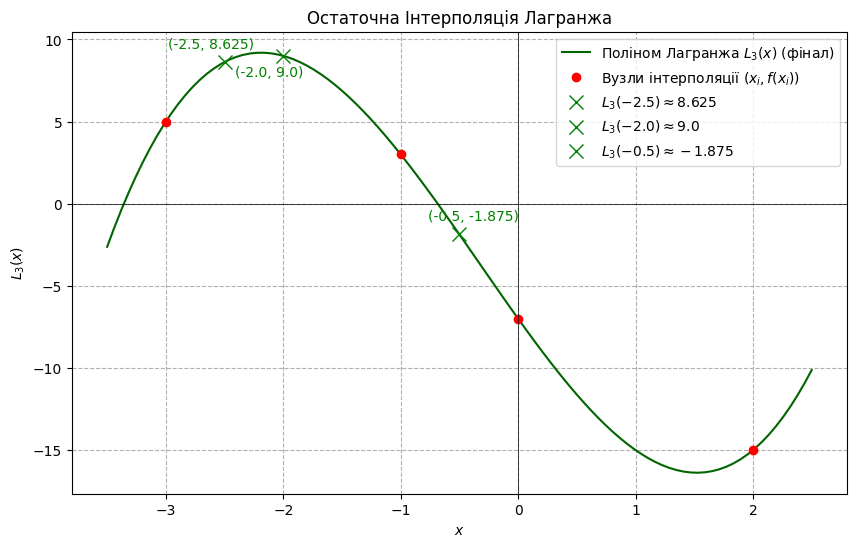

Перевірка x1=-2.5: Самописна=8.625, Scipy=8.625
Перевірка x2=-2.0: Самописна=9.0, Scipy=9.0
Перевірка x3=-0.5: Самописна=-1.875, Scipy=-1.875


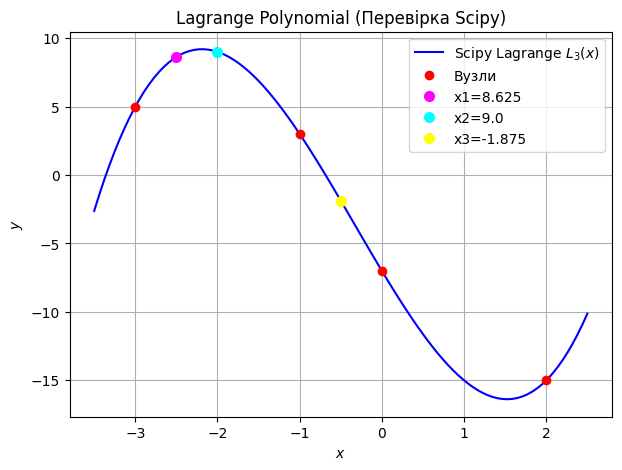

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = np.array([-3, -1, 0, 2], dtype=float)
y = np.array([5, 3, -7, -15], dtype=float)

x1 = -2.5
x2 = -2.0
x3 = -0.5

def lagrange_interpolation(x_nodes, y_nodes, x_test):
    """
    Обчислює значення поліному Лагранжа в точці x_test.
    """
    n = len(x_nodes)
    p_sum = 0.0

    for k in range(n):
        p_prod = 1.0
        for j in range(n):
            if j != k:
                p_prod *= (x_test - x_nodes[j]) / (x_nodes[k] - x_nodes[j])

        p_sum += y_nodes[k] * p_prod

    return p_sum

f1 = lagrange_interpolation(x, y, x1)
f1_rounded = round(f1, 3)
print(f"Значення функції у точці x_1 = {x1} ≈ {f1_rounded}")

f2 = lagrange_interpolation(x, y, x2)
f2_rounded = round(f2, 3)
print(f"Значення функції у точці x_2 = {x2} ≈ {f2_rounded}")

f3 = lagrange_interpolation(x, y, x3)
f3_rounded = round(f3, 3)
print(f"Значення функції у точці x_3 = {x3} ≈ {f3_rounded}")

xnew = np.linspace(np.min(x) - 0.5, np.max(x) + 0.5, 100)
ynew = np.array([lagrange_interpolation(x, y, xi) for xi in xnew])

plt.figure(figsize=(10, 6))

plt.plot(xnew, ynew, label='Поліном Лагранжа $L_3(x)$ (фінал)', color='darkgreen')

plt.plot(x, y, 'ro', label='Вузли інтерполяції $(x_i, f(x_i))$')

plt.plot(x1, f1_rounded, 'gx', markersize=10, label=f'$L_3({x1}) \\approx {f1_rounded}$')
plt.plot(x2, f2_rounded, 'gx', markersize=10, label=f'$L_3({x2}) \\approx {f2_rounded}$')
plt.plot(x3, f3_rounded, 'gx', markersize=10, label=f'$L_3({x3}) \\approx {f3_rounded}$')

plt.annotate(f'({x1}, {f1_rounded})', (x1, f1_rounded), textcoords="offset points", xytext=(-10,10), ha='center', color='green')
plt.annotate(f'({x2}, {f2_rounded})', (x2, f2_rounded), textcoords="offset points", xytext=(-10,-15), ha='center', color='green')
plt.annotate(f'({x3}, {f3_rounded})', (x3, f3_rounded), textcoords="offset points", xytext=(10,10), ha='center', color='green')


plt.xlabel('$x$')
plt.ylabel('$L_3(x)$')
plt.title(f'Остаточна Інтерполяція Лагранжа')
plt.grid(True, linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


f_scipy = lagrange(x, y)

f1_check = round(f_scipy(x1), 3)
f2_check = round(f_scipy(x2), 3)
f3_check = round(f_scipy(x3), 3)

print(f"Перевірка x1={x1}: Самописна={f1_rounded}, Scipy={f1_check}")
print(f"Перевірка x2={x2}: Самописна={f2_rounded}, Scipy={f2_check}")
print(f"Перевірка x3={x3}: Самописна={f3_rounded}, Scipy={f3_check}")

fig = plt.figure(figsize = (7,5))
plt.plot(xnew, f_scipy(xnew), 'b', label='Scipy Lagrange $L_3(x)$')

plt.plot(x, y, 'ro', label='Вузли')

plt.plot(x1, f1_check, 'o', color='magenta', markersize=7, label=f'x1={f1_check}')
plt.plot(x2, f2_check, 'o', color='cyan', markersize=7, label=f'x2={f2_check}')
plt.plot(x3, f3_check, 'o', color='yellow', markersize=7, label=f'x3={f3_check}')


plt.title('Lagrange Polynomial (Перевірка Scipy)')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()